In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw1  = pd.read_csv('raw_data_1.xlsx - INFORMATION TECH.csv')
raw2 = pd.read_csv('raw_data_2.xlsx - Form Responses 1.csv')
templete = pd.read_csv('BlueDots - Sheet1.csv')

In [167]:
raw1.head()

,Name,Mobile Number,Email Address,Age,Address of Associated Institute(with map link),Course,Branch,Enrollment Number
0,Padget Lightmouth,9.605983e+09,user0494@tutanota.com,23.0,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600010
1,Raamkrishna Joshi,8.509206e+09,user0673@tempmail.com,23.0,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E20110139000002
2,Nirbhay Ligonio,8.406072e+09,user0819@mail.com,23.0,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600049
3,Deepak Lhendup,9.102962e+09,user0898@mail.com,24.0,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600024
4,Mohanan Lightknight,8.303638e+09,user0062@zoho.com,24.0,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600051


In [168]:
raw2.head()

,Name,Mobile Number,Email Address,Age,Permanent Address,Address of Associated Institute(with map link),Course,Branch,Enrollment Number,Institution,Notes
0,Ranjde Ligiza,8500798725,user0589@10minutemail.com,23,Baburi chandauli uttar pradesh,Parul University,Diploma,Civil Engg,E20110132200014,Parul University,NaN
1,Omesh Ligier,7908026679,user0151@zoho.com,24,"Gram Babhani Babu,Post Garer,District-Deoria, ...",Parul University,Diploma,Civil Engg,E20110132200054,Parul University,NaN
2,Ranjaya Khanna,9808312308,user0451@tempmail.com,22,"Village-Khanpur, post-Manyoura, distik-Lakhimp...",Parul University,Diploma,Civil Engg,E20110132200033,Parul University,NaN
3,Orkeny Lieser,8803681208,user0507@tempmail.com,24,Vill bhaisora bujurg kasganj up,Parul University,Diploma,Civil Engg,E19110132200049,Parul University,NaN
4,Ranjany Lhetu,7205710032,user0106@guerrillamail.com,23,SAHORIYA BUJURG HARDOI,Parul University,Diploma,Civil Engg,E20110132200061,Parul University,NaN


In [169]:
raw1.shape, raw2.shape

((49, 8), (360, 11))

In [170]:
raw1.columns, raw2.columns, templete.columns

(Index(['Name', 'Mobile Number', 'Email Address', 'Age',
        'Address of Associated Institute(with map link)', 'Course', 'Branch',
        'Enrollment Number'],
       dtype='object'),
 Index(['Name', 'Mobile Number', 'Email Address', ' Age', 'Permanent Address',
        'Address of Associated Institute(with map link)', 'Course', 'Branch',
        'Enrollment Number', 'Institution', 'Notes'],
       dtype='object'),
 Index(['Name', 'Phone', 'Email', 'Age', 'Permanent Address',
        'Address of Associated Institute(with map link)', 'Course', 'Branch',
        'Enrollment', 'Institution', 'Notes', 'Leave blank'],
       dtype='object'))

In [171]:
mark = raw1["Course"].isna() | (raw1["Course"] == "Not Provided")

In [172]:
raw1.loc[mark, "Course"] = "Information Technology"
raw1.loc[mark, "Branch"] = "Information Technology"

# Changed columns name

In [173]:
raw1 = raw1.rename(
    columns={
        "Mobile Number": "Phone",
        "Email Address": "Email",
        "Enrollment Number": "Enrollment"
    }
)

In [174]:
raw2 = raw2.rename(
    columns={
        "Mobile Number": "Phone",
        "Email Address": "Email",
        " Age": "Age",
        "Enrollment Number": "Enrollment"
    }
)

# Concatinated raw1 and raw2

In [175]:
df = pd.concat([raw1, raw2], ignore_index=True)

In [176]:
df.head()

,Name,Phone,Email,Age,Address of Associated Institute(with map link),Course,Branch,Enrollment,Permanent Address,Institution,Notes
0,Padget Lightmouth,9.605983e+09,user0494@tutanota.com,23.0,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600010,NaN,NaN,NaN
1,Raamkrishna Joshi,8.509206e+09,user0673@tempmail.com,23.0,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E20110139000002,NaN,NaN,NaN
2,Nirbhay Ligonio,8.406072e+09,user0819@mail.com,23.0,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600049,NaN,NaN,NaN
3,Deepak Lhendup,9.102962e+09,user0898@mail.com,24.0,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600024,NaN,NaN,NaN
4,Mohanan Lightknight,8.303638e+09,user0062@zoho.com,24.0,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600051,NaN,NaN,NaN


In [177]:
df.columns

Index(['Name', 'Phone', 'Email', 'Age',
       'Address of Associated Institute(with map link)', 'Course', 'Branch',
       'Enrollment', 'Permanent Address', 'Institution', 'Notes'],
      dtype='object')

# Clean Phone numbers

In [178]:
df["Phone"] = df['Phone'].astype(float).astype('Int64')
df["phone_length"]  = df["Phone"].astype(str).str.len()
df["phone_length"].value_counts()

phone_length
10    407
4       2
Name: count, dtype: int64

In [179]:
df = df[df["phone_length"] == 10]

In [180]:
# df['phone_length'].value_counts()
df = df.drop(columns=["phone_length"])

# Clean Age

In [181]:
# df.head()
df['Age'] = df['Age'].astype('Int64')

In [182]:
#df[(df['Age'] <= 15) | (df['Age'] > 60)]
df = df[(df['Age'] > 16) & (df['Age'] <= 60)]

# Clean Emails

In [183]:
# min(df['Age']), max(df['Age'])
# df['Email'].tail()
df['Email'] = df['Email'].fillna('Not Provided')

In [184]:
# df[df['Email'] == 'Not Provided']
df.loc[~df['Email'].astype(str).str.contains("@"), "Eamil"] = "Not Provided" # there are not invalid inmails

# Clean text formatting

In [185]:
# df.head()

text_cols = [
    "Name",
    "Email",
    "Permanent Address",
    "Address of Associated Institute(with map link)",
    "Course",
    "Branch",
    "Institution",
    "Notes"
]

for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

In [186]:
# df.head()


# Reordering columns like templates

In [187]:
# df.head()
final_df = df[[
    "Name",
    "Phone",
    "Email",
    "Age",
    "Permanent Address",
    "Address of Associated Institute(with map link)",
    "Course",
    "Branch",
    "Enrollment",
    "Institution",
    "Notes"
]].copy()


# Adding leave blank column

In [188]:
final_df['Leave blank'] = ""

In [189]:
final_df = final_df.replace("nan", pd.NA)

In [190]:
final_df['Institution'] = final_df['Institution'].fillna('Not Provided')
final_df["Notes"] = final_df["Notes"].fillna("Not Provided")

# Handling Institute values

In [191]:
mask = (final_df["Institution"] == "Not Provided") | (final_df["Institution"].isna())

In [192]:
final_df.loc[mask, 'Institution'] = 'Govt Polytechnic Ghaziabad'

In [199]:
final_df.to_excel("processed_blue_dots.xlsx", index=False)

In [250]:
final_df.head()

,Name,Phone,Email,Age,Permanent Address,Address of Associated Institute(with map link),Course,Branch,Enrollment,Institution,Notes,Leave blank
0,Padget Lightmouth,9605983306,user0494@tutanota.com,23,<NA>,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600010,Govt Polytechnic Ghaziabad,Not Provided,
1,Raamkrishna Joshi,8509205875,user0673@tempmail.com,23,<NA>,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E20110139000002,Govt Polytechnic Ghaziabad,Not Provided,
2,Nirbhay Ligonio,8406071774,user0819@mail.com,23,<NA>,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600049,Govt Polytechnic Ghaziabad,Not Provided,
3,Deepak Lhendup,9102962361,user0898@mail.com,24,<NA>,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600024,Govt Polytechnic Ghaziabad,Not Provided,
4,Mohanan Lightknight,8303637513,user0062@zoho.com,24,<NA>,"Government Polytechnic Ghaziabad, \nHapur Road...",Diploma,Information Technology,E19110135600051,Govt Polytechnic Ghaziabad,Not Provided,


# Age Distribution

/var/folders/zm/92qn2sf553961xt_nm0z1fdc0000gn/T/ipykernel_5475/1690403046.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


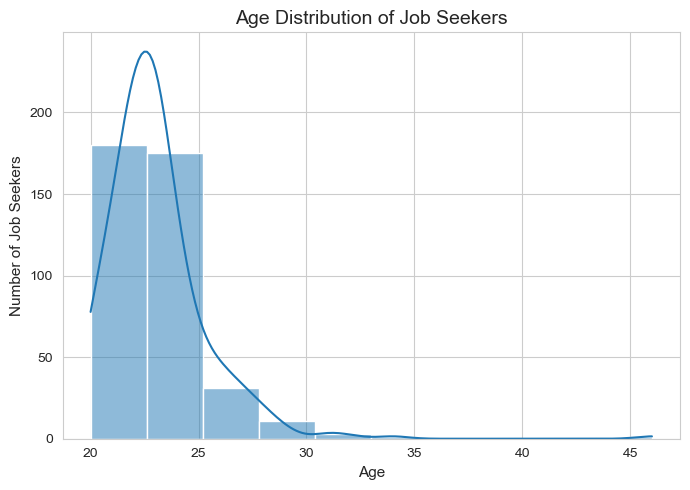

In [231]:
sns.set_style("whitegrid")

plt.figure(figsize=(7,5))
sns.histplot(
    data=final_df,
    x="Age",
    bins=10,
    kde=True,
    palette="viridis"
)

plt.title("Age Distribution of Job Seekers", fontsize=14)
plt.xlabel("Age", fontsize=11)
plt.ylabel("Number of Job Seekers", fontsize=11)

# sns.despine(right=True)
plt.tight_layout()
plt.show()

# Top Courses

In [236]:
final_df["Course"].nunique() == 1

True

# Top Institutes

/var/folders/zm/92qn2sf553961xt_nm0z1fdc0000gn/T/ipykernel_5475/2886446188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


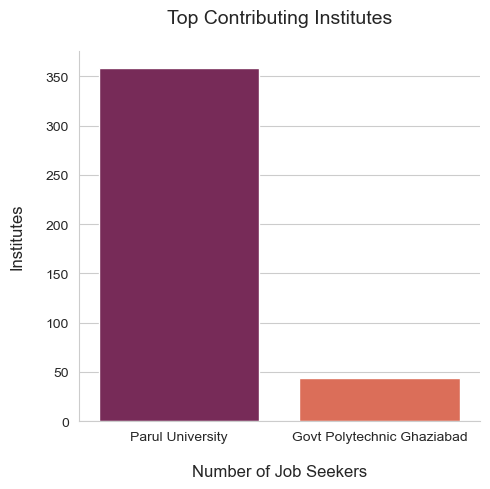

In [248]:
top_institutes = final_df["Institution"].value_counts().head(10)

plt.figure(figsize=(5,5))
sns.barplot(
    x=top_institutes.index,
    y=top_institutes.values,
    palette="rocket"
)

plt.title("Top Contributing Institutes", fontsize=14, pad=20)
plt.xlabel("Number of Job Seekers", fontsize=12, labelpad=15)
plt.ylabel("Institutes", fontsize=12, labelpad=15)

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()


# Address Coverage

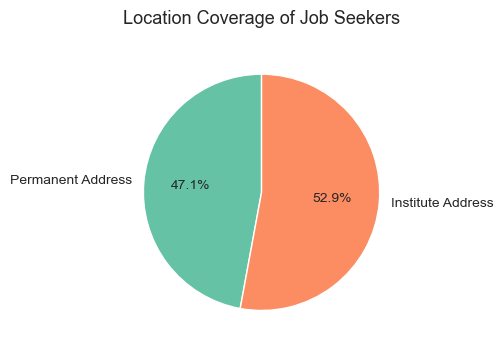

In [249]:
labels = ["Permanent Address", "Institute Address"]
values = [
    final_df["Permanent Address"].notna().sum(),
    final_df["Address of Associated Institute(with map link)"].notna().sum()
]

colors = sns.color_palette("Set2")

plt.figure(figsize=(5,5))
plt.pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white"}
)

plt.title("Location Coverage of Job Seekers", fontsize=13, pad=15)
plt.tight_layout()
plt.show()

In [252]:
final_df['Branch'].value_counts()

Branch
ME CAD                                    64
ME Automobile                             60
ME Production                             57
IT                                        50
Electronics                               49
Information Technology                    44
Civil Engg                                43
PGD in Web Designing                      12
PGD in Computer Hardware & Networking     10
PGD in Cyber Security                      7
PGD in IoT                                 3
PGD in Mass Communication & Journalism     3
Name: count, dtype: int64

# Top Branch

/var/folders/zm/92qn2sf553961xt_nm0z1fdc0000gn/T/ipykernel_5475/2108829163.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


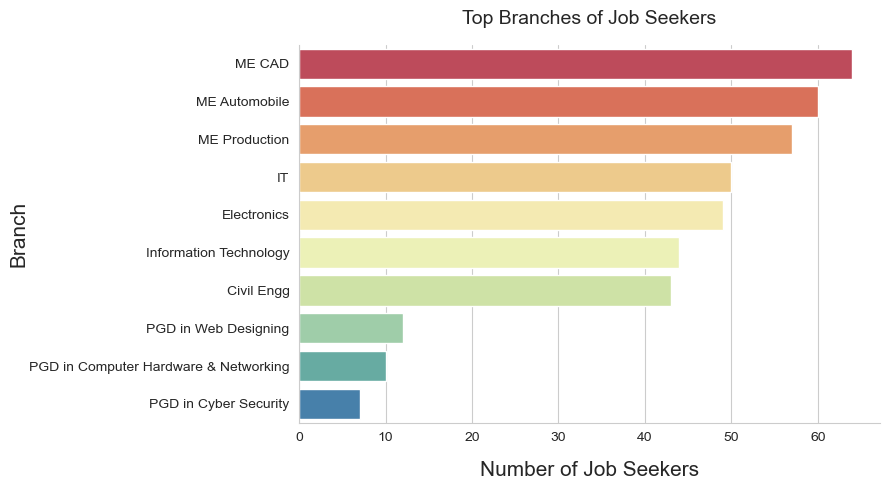

In [262]:
top_branches = final_df["Branch"].value_counts().head(10)

plt.figure(figsize=(9,5))
sns.barplot(
    x=top_branches.values,
    y=top_branches.index,
    palette="Spectral"
)

plt.title("Top Branches of Job Seekers", fontsize=14, pad=15)
plt.xlabel("Number of Job Seekers", fontsize=15, labelpad=12)
plt.ylabel("Branch", fontsize=15, labelpad=0)

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()